# Memoization & Dynamic Programming 

### Topics to discuss today:

<ul>
    <li>Time and Space Complexity  of recursive fibonnaci</li>
    <li>The fibonacci Tree</li>
    <li>storing solutions to sub problems</li>
    <li>solving popular problems</li>
</ul>
<br><br><br><br>

### The Fibonacci sequence

In [14]:
def fib(n):
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)

# Test the function
print(fib(40))


102334155


In [15]:
# iterative fiboncci
# anything you do recursively you can do it iteratively
def fiboncci_iter(n):
    fib_list = [0, 1]

    for i in range(2, n):
        next_fib = fib_list[-1] + fib_list[-2]
        fib_list.append(next_fib)

    return fib_list
print()

fiboncci_iter(8)

[0, 1, 1, 2, 3, 5, 8, 13]

In [12]:
#Dealing with Time space and recursion

def dib(n):
    print(n)
    if n <= 1:
        return 1
    else: 
        return dib(n-1) # Extra call on the stack = O(n) time
    
dib(5)

5
4
3
2
1


1

Calculating the time space complexity of the Fibbonacci sequence


## Trees

the fibonacci sequence can be visualized using a tree structure. Lets look at the elements of a tree before discussing the fibonnaci tree:

<img src="https://www.tutorialspoint.com/data_structures_algorithms/images/binary_tree.jpg" style="height:400px;">

Let's look at the fibonnaci tree:

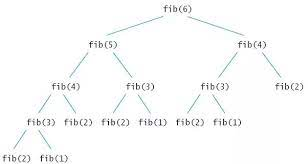

## Memoization

#### What is it?

In computing, memoization or memoisation is an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again. Memoization has also been used in other contexts (and for purposes other than speed gains), such as in simple mutually recursive descent parsing.

#### When should we use it?

Some problems are largely made of <b>overlapping subproblems</b>. When we find our code is solving the same problem multiple times over it's a good idea to store them so we don't have to recompute those solutions. This is known as Dynamic Programming 

In [16]:
#The super power of Dictionaries
def fib(n, cache = {}):
    if n in cache:
        return cache[n]
    if n <= 1:
        return n
    else:
        cache[n] = fib(n-1) + fib(n-2)
        return cache[n]
        
fib(40)

102334155

## Decorators

<p>A Decorator in Python is a function that takes another function that as an argument, and returns a 3rd function. Decorators are extremely useful as they allow the extenson of an existing function, without any of the original source code.</p>

In [28]:
#functions can be returned as objects

def shout(words):
    return words.upper()

def whisper(words):
    return words.lower()

def proper_talk(words):
    return words.title()

print(shout("Hey There")) #we can simply call this function

yell = shout #but we can also store this function to a variable/object 

print(yell('Hey There Again')) #and use that variable


print(whisper("DID YOU HEAR THAT JENNY POOPED HER PANTS IN MATH CLASS"))


print(proper_talk("hello madame, i think you are quite riveting"))
flirt = proper_talk

print(flirt("i want to ____ you"))


HEY THERE
HEY THERE AGAIN
did you hear that jenny pooped her pants in math class
Hello Madame, I Think You Are Quite Riveting
I Want To ____ You


In [29]:
#we can also pass functions as arguments

def whisper(words):
    return words.lower()


def say_something(func): #the function is a parameter
    
    return func("I'm not asking for permission, I'm doing this.")


print(say_something(shout)) #passing in the function shout & whisper as an argument
print(say_something(whisper))

I'M NOT ASKING FOR PERMISSION, I'M DOING THIS.
i'm not asking for permission, i'm doing this.


In [30]:
#decorators do the opposite
#instead of passing in another function as an argument to extend the utility of that function (aka passing in shout into say_something)
#we pass in our function we want to extend the utility of it as an argument


def say_something():
    return "'I'm not asking for permission, I'm doing this.' - the exact quote I will say when I'm grabbing the keys to go get a cat"

def uppercase_decorator(function):
    
    #with decorators it is convention to have the outer function "wrap" the inner function
    #the inner function is a wrapper function where the actual argument is called/used
    
    #the inner function can access the outer local variables like the function
    #we also have the function inside the function because it helps with debugging & maintaince of decorators
    
    """
    Decorator to UpperCase any argument passed into it
    """
    
    def wrapper():
        func = function()
        make_uppercase = func.upper()
        return make_uppercase
    return wrapper

return_func = uppercase_decorator(say_something)
return_func()

"'I'M NOT ASKING FOR PERMISSION, I'M DOING THIS.' - THE EXACT QUOTE I WILL SAY WHEN I'M GRABBING THE KEYS TO GO GET A CAT"

In [31]:
help(uppercase_decorator)

Help on function uppercase_decorator in module __main__:

uppercase_decorator(function)
    Decorator to UpperCase any argument passed into it



In [32]:
#Decorator Syntax

@uppercase_decorator
def im_doing_this():
    return "I'm not asking for permission, I'm doing this."


In [33]:
im_doing_this()

"I'M NOT ASKING FOR PERMISSION, I'M DOING THIS."

In [34]:
print(im_doing_this)

<function uppercase_decorator.<locals>.wrapper at 0x111afa7a0>


In [35]:
#what if we passed in arguments though? 

def uppercase_decorator(function):
    def wrapper(*args, **kwargs):
        func = function(*args, **kwargs)
        make_upper = func.upper()  # Call the original function with any passed arguments & keyword arguments
        return make_upper  # Apply the uppercase transformation
    return wrapper

@uppercase_decorator
def teletubbies(*args):
    teletubbies = ",".join(args)
#     print(teletubbies)
    return f"{teletubbies}, I'm not asking for permission, I'm doing this."



In [36]:
my_teles = 'Tinky Winky, Dipsy, La La, Po'
result = teletubbies(my_teles)
print(result)

TINKY WINKY, DIPSY, LA LA, PO, I'M NOT ASKING FOR PERMISSION, I'M DOING THIS.


## TwoSum Problem

Given an array of integers, return the two numbers such that they add up to a specific target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

In [ ]:
# In Python, the space complexity of an algorithm can be quadratic if the algorithm uses a nested loop and 
# creates a new data structure for each iteration of the outer loop, and the size of the new data structure is 
# proportional to the number of iterations of the inner loop. For example, a nested loop that creates a new list 
# for each iteration of the outer loop, and appends to the list for each iteration of the inner loop, would have a 
# space complexity of O(n^2), where n is the number of iterations of the outer loop."

In [2]:
integers = [1,2,3,5,7]
arr = [5, 1, 3, 9, 10, 6]
target = 10

In [3]:
def two_sum(arr, target):
    
    solution = {}
    index = 0
    
    for current_element in arr:
        difference = target - current_element
        
        if difference not in solution:
            solution[current_element] = index
            index += 1
        
        elif difference in solution:
            return (current_element, difference)

two_sum(integers, target)

(7, 3)

In [4]:
def two_sum(arr, target):
    
    solution = {}
    
    for index, current_element in enumerate(arr):
        difference = target - current_element
        
        if difference in solution:
            # return indices of the two values
            indices = (solution[difference], index)
            # return the two values
            values = (arr[solution[difference]], current_element)
        
            return f"these are the two values: {values}. At these indices: {indices}. Value {values[0]} at index {indices[0]} and value {values[1]} at index {indices[1]}"

        
        solution[current_element] = index
    
    return None

two_sum(arr, target)

'these are the two values: (1, 9). At these indices: (1, 3). Value 1 at index 1 and value 9 at index 3'

Sum of Pairs https://www.codewars.com/kata/54d81488b981293527000c8f

In [5]:
def sum_pairs(ints, s):
    solution = {}
    
    for index, current_element in enumerate(ints):
        difference = s - current_element
        
        if difference in solution:
            return [ints[solution[difference]], current_element]
        
        solution[current_element] = index
    
    return None